<a href="https://colab.research.google.com/github/martianjob/chatbot/blob/main/BOW_TFIDF_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import pandas as pd
import os
import string
import random, re
!pip install contractions
import contractions
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline

In [127]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:

os.chdir('/content/drive/My Drive/Colab Notebooks/NLP/CAPSTONE/')

In [129]:
# locading input data from csv 
print("Loading the input csv data")
data = pd.read_csv("IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
data.head(5)

Loading the input csv data


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [130]:
print("*"*30)
print("Droping unwanted coulmns")
data = data.drop(data.columns[[0]],axis=1)


******************************
Droping unwanted coulmns


In [131]:
data.head(5)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [132]:
# Removing punctuations
def punct_remover(data):
  data= data.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
  print(f'punctuations {string.punctuation} removed from Description coulmn')
  return data

# Contractions expension
def contaction_exp(data):
  data = data.apply(lambda x: contractions.fix(x))
  print("contractions expension on the Description column completed")
  return data

# Convert text to lowercase
def to_lower(data):
  data = data.apply(lambda x: x.lower())
  print("Converted Description to lowercase")
  return data

#Remove single letter word
def rm_singles(data):
  data = data.apply(lambda x:re.sub(r'\b\w{1}\b',"",x ,flags=re.I))
  print("Removed the single letter from the Description column data")
  return data

#Remove NA
def rm_na(data):
  data = data.apply(lambda x:re.sub(r'\bNA\b',"",x ,flags=re.I))
  print("Removed the NA from the Description column data")
  return data


#Removing the email addresses
def rm_emails(data):
  data = data.apply(lambda x: re.sub(r"\S+@\S+", "",x ,flags=re.I))
  print("Removed email id from the Description column data")
  return data

#Remove all date formats 
#pattern_str="^(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?(?:(?:(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:(?:-|/)|(?:,|\.)?\s)?)?(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?)(?:\d{2,4})$"
def rm_date_format(data):
  data = data.apply(lambda x: re.sub(r"^(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?(?:(?:(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:(?:-|/)|(?:,|\.)?\s)?)?(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?)(?:\d{2,4})$", "",x ,flags=re.I))
  print("Removed date from the Description column data")
  return data

#Remove digits
def rm_digit(data):
  data = data.apply(lambda x: re.sub(r"\d", "",x ,flags=re.I))
  print("Removed digits from the Description column data")
  return data

# Strip unwanted spaces
def rm_unwanted_spaces(data):
  data = data.apply(lambda x: re.sub(' +', ' ', x))
  print("Striped unwanted spaces from the Description column data")
  return data

# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
def rm_stopwords(data):
  data = data.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
  print("Removed the stopwords in the Description column")
  return data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
# cleaning on Description
data['Description'] = to_lower(data['Description']) # lowering the letters
data['Description'] = punct_remover(data['Description'])  # removing punctuations 
data['Description'] = contaction_exp(data['Description']) # contaction expansion
data['Description'] = rm_singles(data['Description'])  # removing single characters
data['Description'] = rm_na(data['Description'])  # removing NA
data['Description'] = rm_emails(data['Description']) # removing emails
data['Description'] = rm_date_format(data['Description']) # removing dates
data['Description'] = rm_digit(data['Description'])  # removing digits
data['Description'] = rm_unwanted_spaces(data['Description']) # removing unwanted spaces
data['Description'] = rm_stopwords(data['Description']) # stopwords removed
data['Description'].head(10)

Converted Description to lowercase
punctuations !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ removed from Description coulmn
contractions expension on the Description column completed
Removed the single letter from the Description column data
Removed the NA from the Description column data
Removed email id from the Description column data
Removed date from the Description column data
Removed digits from the Description column data
Striped unwanted spaces from the Description column data
Removed the stopwords in the Description column


0    removing drill rod jumbo maintenance superviso...
1    activation sodium sulphide pump piping uncoupl...
2    substation milpo located level collaborator ex...
3    approximately nv cx ob personnel begins task u...
4    approximately circumstances mechanics anthony ...
5    unloading operation ustulado bag need unclog d...
6    collaborator reports street holding left hand ...
7    approximately pm mechanic technician josé tecn...
8    employee sitting resting area level raise bore...
9    moment forklift operator went manipulate big b...
Name: Description, dtype: object

In [134]:
print("Lemetizeing the words")
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
wordNet = WordNetLemmatizer()

def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV }
    return(' '.join([wordNet.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

print('Applying Lemmatizer')
data['Description'] = data['Description'].apply(lambda x: lem(x))

Lemetizeing the words
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Applying Lemmatizer


In [135]:
data['Description'].head(10)

0    removing drill rod jumbo maintenance superviso...
1    activation sodium sulphide pump piping uncoupl...
2    substation milpo located level collaborator ex...
3    approximately nv cx ob personnel begin task un...
4    approximately circumstance mechanic anthony gr...
5    unloading operation ustulado bag need unclog d...
6    collaborator report street holding left hand v...
7    approximately pm mechanic technician josé tecn...
8    employee sitting resting area level raise bore...
9    moment forklift operator went manipulate big b...
Name: Description, dtype: object

In [136]:
text=" ".join(description for description in data.Description )

In [137]:
len(text.split())

14018

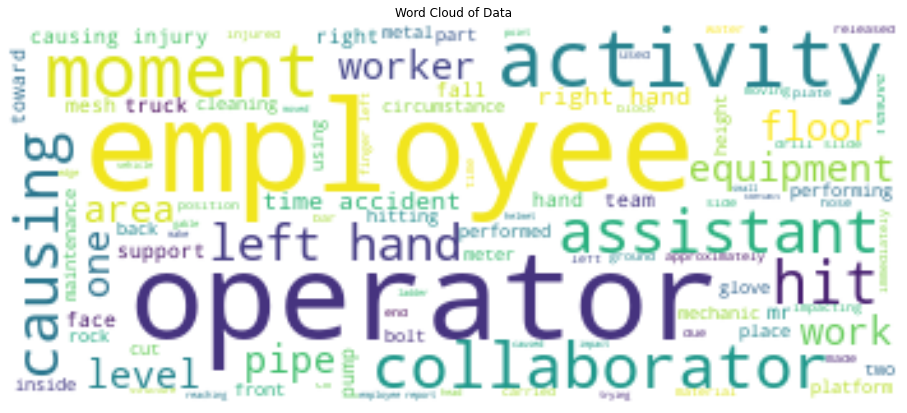

In [138]:

# lower max_font_size, change the maximum number of word and lighten the background:
def plot_wordcloud(text,title):
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",width = 350, height = 150,collocations = True).generate(text)
  plt.figure(figsize=(16,8))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(title)
  plt.axis("off")
  plt.show()

plot_wordcloud(text,"Word Cloud of Data")

In [139]:
data['Industry Sector'].unique()

array(['Mining', 'Metals', 'Others'], dtype=object)

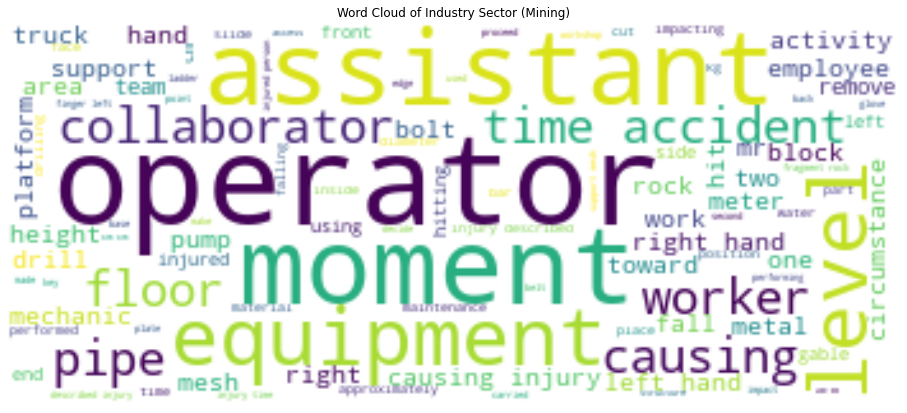

In [140]:
filter_data = ' '.join((data.loc[data['Industry Sector'] == 'Mining']).Description)
plot_wordcloud(filter_data,"Word Cloud of Industry Sector (Mining)")

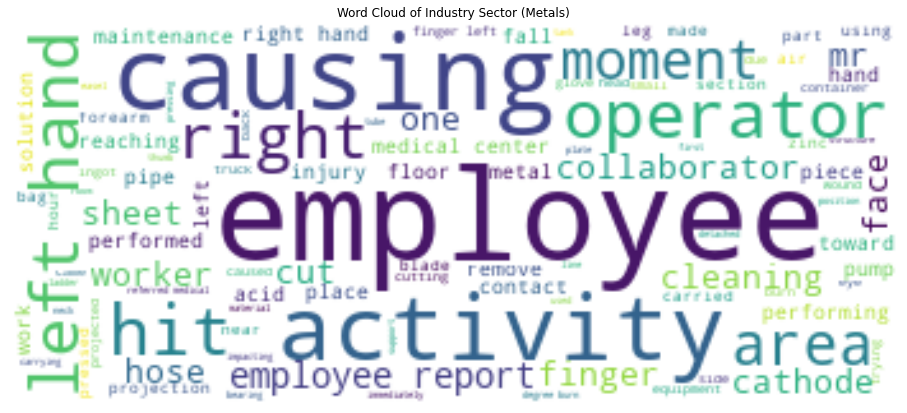

In [141]:
filter_data = ' '.join((data.loc[data['Industry Sector'] == 'Metals']).Description)
plot_wordcloud(filter_data,"Word Cloud of Industry Sector (Metals)")

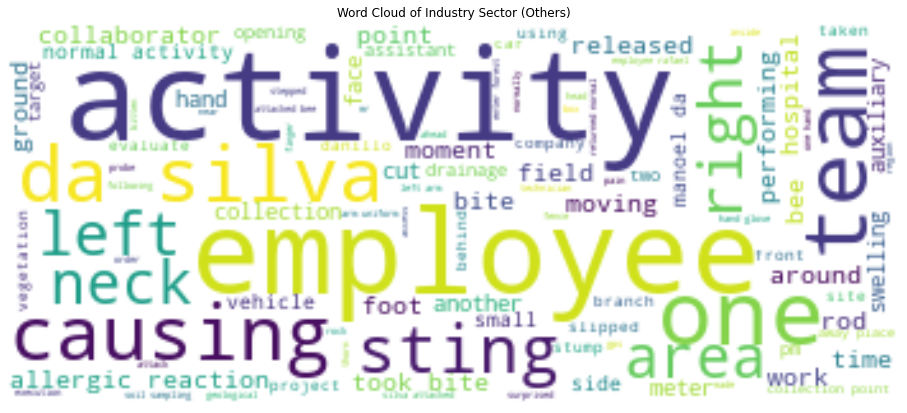

In [142]:
filter_data = ' '.join((data.loc[data['Industry Sector'] == 'Others']).Description)
plot_wordcloud(filter_data,"Word Cloud of Industry Sector (Others)")

In [143]:
data['labels'] = data.apply(lambda row: [row['Accident Level'], row['Potential Accident Level']], axis=1)

In [144]:
data['labels'].head()

0     [I, IV]
1     [I, IV]
2    [I, III]
3      [I, I]
4    [IV, IV]
Name: labels, dtype: object

In [145]:
## One hot encoding 
data.head(2)


,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,labels
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,removing drill rod jumbo maintenance superviso...,"[I, IV]"
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,activation sodium sulphide pump piping uncoupl...,"[I, IV]"


In [146]:
data=data.drop(['Accident Level','Potential Accident Level'],axis=1)

In [147]:
X=data.drop(['labels','Data'],axis=1)
X.head(2)

,Countries,Local,Industry Sector,Genre,Employee or Third Party,Critical Risk,Description
0,Country_01,Local_01,Mining,Male,Third Party,Pressed,removing drill rod jumbo maintenance superviso...
1,Country_02,Local_02,Mining,Male,Employee,Pressurized Systems,activation sodium sulphide pump piping uncoupl...


In [148]:
X['Countries'] = to_lower(X['Countries'])
X['Local'] = to_lower(X['Local'])
X['Industry Sector'] = to_lower(X['Industry Sector'])
X['Genre'] = to_lower(X['Genre'])
X['Employee or Third Party'] = to_lower(X['Employee or Third Party'])
X['Critical Risk'] = to_lower(X['Critical Risk'])
#X.head(3)

Converted Description to lowercase
Converted Description to lowercase
Converted Description to lowercase
Converted Description to lowercase
Converted Description to lowercase
Converted Description to lowercase


In [149]:
X = pd.get_dummies(X,columns=['Countries','Local','Genre','Industry Sector','Employee or Third Party','Critical Risk'])

In [150]:
X.head(3)

,Description,Countries_country_01,Countries_country_02,Countries_country_03,Local_local_01,Local_local_02,Local_local_03,Local_local_04,Local_local_05,Local_local_06,Local_local_07,Local_local_08,Local_local_09,Local_local_10,Local_local_11,Local_local_12,Genre_female,Genre_male,Industry Sector_metals,Industry Sector_mining,Industry Sector_others,Employee or Third Party_employee,Employee or Third Party_third party,Employee or Third Party_third party (remote),Critical Risk_\nnot applicable,Critical Risk_bees,Critical Risk_blocking and isolation of energies,Critical Risk_burn,Critical Risk_chemical substances,Critical Risk_confined space,Critical Risk_cut,Critical Risk_electrical installation,Critical Risk_electrical shock,Critical Risk_fall,Critical Risk_fall prevention,Critical Risk_fall prevention (same level),Critical Risk_individual protection equipment,Critical Risk_liquid metal,Critical Risk_machine protection,Critical Risk_manual tools,Critical Risk_others,Critical Risk_plates,Critical Risk_poll,Critical Risk_power lock,Critical Risk_pressed,Critical Risk_pressurized systems,Critical Risk_pressurized systems / chemical substances,Critical Risk_projection,Critical Risk_projection of fragments,Critical Risk_projection/burning,Critical Risk_projection/choco,Critical Risk_projection/manual tools,Critical Risk_remains of choco,Critical Risk_suspended loads,Critical Risk_traffic,Critical Risk_vehicles and mobile equipment,Critical Risk_venomous animals
0,removing drill rod jumbo maintenance superviso...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,activation sodium sulphide pump piping uncoupl...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,substation milpo located level collaborator ex...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [151]:
y=data['labels']
y.head(2)

0    [I, IV]
1    [I, IV]
Name: labels, dtype: object

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [153]:
#TFIDF matrix
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['Description'])
X_test_tfidf = vectorizer.transform(X_test['Description'])
vectorizer.get_feature_names()[:5]

['abb', 'abdomen', 'able', 'abrupt', 'abruptly']

In [154]:
#Creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train['Description'])
X_test_bow = vectorizer.transform(X_test['Description'])

In [155]:
vectorizer.get_feature_names()[:5]

['abb', 'abb furnace', 'abdomen', 'abdomen left', 'able']

In [156]:
#view term documant matrix 
df=pd.DataFrame(X_train_tfidf.todense())
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.100536,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124723,0.0,0.092982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.191152,0.092982,0.0,0.100863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(340, 2480)
(85, 2480)


In [158]:
#view BOW matrix 
df=pd.DataFrame(X_train_bow.todense())
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10972,10973,10974,10975,10976,10977,10978,10979,10980,10981,10982,10983,10984,10985,10986,10987,10988,10989,10990,10991,10992,10993,10994,10995,10996,10997,10998,10999,11000,11001,11002,11003,11004,11005,11006,11007,11008,11009,11010,11011
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [159]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(340, 11012)
(85, 11012)


In [160]:
### concatinate TFIDF with other binary features
X_train=X_train.drop(['Description'],axis=1)
X_train.columns

Index(['Countries_country_01', 'Countries_country_02', 'Countries_country_03',
       'Local_local_01', 'Local_local_02', 'Local_local_03', 'Local_local_04',
       'Local_local_05', 'Local_local_06', 'Local_local_07', 'Local_local_08',
       'Local_local_09', 'Local_local_10', 'Local_local_11', 'Local_local_12',
       'Genre_female', 'Genre_male', 'Industry Sector_metals',
       'Industry Sector_mining', 'Industry Sector_others',
       'Employee or Third Party_employee',
       'Employee or Third Party_third party',
       'Employee or Third Party_third party (remote)',
       'Critical Risk_\nnot applicable', 'Critical Risk_bees',
       'Critical Risk_blocking and isolation of energies',
       'Critical Risk_burn', 'Critical Risk_chemical substances',
       'Critical Risk_confined space', 'Critical Risk_cut',
       'Critical Risk_electrical installation',
       'Critical Risk_electrical shock', 'Critical Risk_fall',
       'Critical Risk_fall prevention',
       'Critical Ri

In [161]:
X_test_bk=X_test.copy()
X_test=X_test.drop(['Description'],axis=1)
X_test.head(2)

,Countries_country_01,Countries_country_02,Countries_country_03,Local_local_01,Local_local_02,Local_local_03,Local_local_04,Local_local_05,Local_local_06,Local_local_07,Local_local_08,Local_local_09,Local_local_10,Local_local_11,Local_local_12,Genre_female,Genre_male,Industry Sector_metals,Industry Sector_mining,Industry Sector_others,Employee or Third Party_employee,Employee or Third Party_third party,Employee or Third Party_third party (remote),Critical Risk_\nnot applicable,Critical Risk_bees,Critical Risk_blocking and isolation of energies,Critical Risk_burn,Critical Risk_chemical substances,Critical Risk_confined space,Critical Risk_cut,Critical Risk_electrical installation,Critical Risk_electrical shock,Critical Risk_fall,Critical Risk_fall prevention,Critical Risk_fall prevention (same level),Critical Risk_individual protection equipment,Critical Risk_liquid metal,Critical Risk_machine protection,Critical Risk_manual tools,Critical Risk_others,Critical Risk_plates,Critical Risk_poll,Critical Risk_power lock,Critical Risk_pressed,Critical Risk_pressurized systems,Critical Risk_pressurized systems / chemical substances,Critical Risk_projection,Critical Risk_projection of fragments,Critical Risk_projection/burning,Critical Risk_projection/choco,Critical Risk_projection/manual tools,Critical Risk_remains of choco,Critical Risk_suspended loads,Critical Risk_traffic,Critical Risk_vehicles and mobile equipment,Critical Risk_venomous animals
417,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [162]:
## concatinate the  X_train & X_train_tfidf
X_train.head()

,Countries_country_01,Countries_country_02,Countries_country_03,Local_local_01,Local_local_02,Local_local_03,Local_local_04,Local_local_05,Local_local_06,Local_local_07,Local_local_08,Local_local_09,Local_local_10,Local_local_11,Local_local_12,Genre_female,Genre_male,Industry Sector_metals,Industry Sector_mining,Industry Sector_others,Employee or Third Party_employee,Employee or Third Party_third party,Employee or Third Party_third party (remote),Critical Risk_\nnot applicable,Critical Risk_bees,Critical Risk_blocking and isolation of energies,Critical Risk_burn,Critical Risk_chemical substances,Critical Risk_confined space,Critical Risk_cut,Critical Risk_electrical installation,Critical Risk_electrical shock,Critical Risk_fall,Critical Risk_fall prevention,Critical Risk_fall prevention (same level),Critical Risk_individual protection equipment,Critical Risk_liquid metal,Critical Risk_machine protection,Critical Risk_manual tools,Critical Risk_others,Critical Risk_plates,Critical Risk_poll,Critical Risk_power lock,Critical Risk_pressed,Critical Risk_pressurized systems,Critical Risk_pressurized systems / chemical substances,Critical Risk_projection,Critical Risk_projection of fragments,Critical Risk_projection/burning,Critical Risk_projection/choco,Critical Risk_projection/manual tools,Critical Risk_remains of choco,Critical Risk_suspended loads,Critical Risk_traffic,Critical Risk_vehicles and mobile equipment,Critical Risk_venomous animals
17,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
222,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
X_train.to_numpy()

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [164]:
final_x_train_tfidf = np.concatenate((X_train.to_numpy(),X_train_tfidf.toarray()),axis=1)
final_x_train_bow = np.concatenate((X_train.to_numpy(),X_train_bow.toarray()),axis=1)

In [165]:
final_x_test_tfidf=np.concatenate((X_test.to_numpy(),X_test_tfidf.toarray()),axis=1)
final_x_test_bow=np.concatenate((X_test.to_numpy(),X_test_bow.toarray()),axis=1)

In [166]:
##############################

In [167]:
label_counts = dict()

for labels in data.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

In [168]:
label_counts

{'I': 365, 'II': 135, 'III': 137, 'IV': 173, 'V': 39, 'VI': 1}

In [169]:
# Load a multilabel binarizer and fit it on the labels.
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=sorted(label_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)
mlb.classes_

array(['I', 'II', 'III', 'IV', 'V', 'VI'], dtype=object)

In [170]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
clf_tfidf = LogisticRegression(solver='liblinear')
clf_bow = LogisticRegression(solver='liblinear')
clf_tfidf = OneVsRestClassifier(clf_tfidf)
clf_bow = OneVsRestClassifier(clf_bow)

In [171]:
clf_tfidf.fit(final_x_train_tfidf, y_train)
clf_bow.fit(final_x_train_bow, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [172]:
predicted_labels_tfidf = clf_tfidf.predict(final_x_test_tfidf)
predicted_labels_bow = clf_bow.predict(final_x_test_bow)
predicted_scores_tfidf = clf_tfidf.decision_function(final_x_test_tfidf)
predicted_scores_bow = clf_bow.decision_function(final_x_test_bow)
print(f"predicted_scores for TFIDF = {predicted_scores_tfidf}")
print(f"predicted_scores for BOW = {predicted_scores_bow}")

predicted_scores for TFIDF = [[ 2.13780266e+00 -2.25775953e+00 -1.63981414e+00 -2.06007230e+00
  -4.93680406e+00 -5.53934760e+00]
 [ 1.66908653e+00 -1.96995299e+00 -6.42837336e-01  1.33781385e-01
  -3.15786207e+00 -5.74949807e+00]
 [ 2.17181421e+00 -8.03841982e-01 -3.47803893e-01 -5.29397144e-01
  -4.62978593e+00 -5.34556568e+00]
 [ 1.23866140e+00 -1.82450334e+00 -7.74404130e-01  4.27674248e-01
  -2.38041000e+00 -5.18722764e+00]
 [ 4.73759827e-01 -2.73466576e+00 -1.47301937e+00  2.55937193e-01
  -4.94922598e-01 -3.91264069e+00]
 [ 9.15211534e-03 -6.78101644e-01 -5.36777153e-01 -1.25399083e+00
  -1.16341677e+00 -4.83824094e+00]
 [ 1.00386005e+00 -2.97235838e-01 -7.44490891e-01 -1.52404457e+00
  -3.46707621e+00 -5.04835713e+00]
 [ 2.09734953e+00 -2.57294482e+00 -2.95928240e+00 -2.26028980e+00
  -3.76765644e+00 -4.33784368e+00]
 [ 3.38413071e-01  3.59839034e-01 -1.03990094e+00 -5.29255016e-01
  -1.25742785e+00 -3.13117075e+00]
 [ 1.30419218e+00 -1.87252760e+00 -8.05627023e-01  1.56727214e

In [173]:
pred_inversed_tfidf = mlb.inverse_transform(predicted_labels_tfidf)
y_test_inversed_tfidf = mlb.inverse_transform(y_test)
pred_inversed_bow = mlb.inverse_transform(predicted_labels_bow)
y_test_inversed_bow = mlb.inverse_transform(y_test)

In [174]:
print(X_test_bk['Description'])

417    technician returning activity bite stepped loo...
75     parking equipment dumper ° maintenance worksho...
176    employee report draining ammonia used refriger...
30     plant operator semikneeling lifting lid gate k...
357    activity changing conveyor belt b feeding prim...
                             ...                        
94     employee report attempting manually ingot zinc...
374    execution service opening pricked future work ...
57     installing ripper pin tractor dtn ripper suppo...
124    transit fuel tanker level level north ramp pas...
24     operator g deslaminadora section unlocking she...
Name: Description, Length: 85, dtype: object


In [175]:
print(pred_inversed_tfidf)
print(pred_inversed_bow)

[('I',), ('I', 'IV'), ('I',), ('I', 'IV'), ('I', 'IV'), ('I',), ('I',), ('I',), ('I', 'II'), ('I', 'IV'), ('I',), ('I', 'IV'), ('I',), ('I',), ('I', 'IV'), ('I', 'IV'), ('I', 'II'), ('I',), ('I',), ('I', 'II'), ('I',), ('I',), ('I',), ('I',), ('I',), ('I',), ('I', 'III'), ('I', 'II'), ('I', 'IV'), ('I', 'IV'), ('I', 'III'), ('I',), ('I', 'II'), ('I',), ('I', 'IV'), ('I', 'IV'), ('I', 'IV'), ('II', 'III'), ('I', 'IV'), ('I', 'II'), ('I', 'III'), ('I',), ('I',), ('I', 'IV'), (), ('I',), ('I',), ('I', 'IV'), ('I',), ('I', 'IV'), ('I',), ('I',), ('I',), ('I', 'IV'), ('I',), ('I', 'II'), ('I', 'IV'), ('I', 'IV'), ('I', 'III'), ('II', 'III'), ('I', 'IV'), ('I', 'IV'), ('I',), ('I',), ('I',), ('I', 'II'), ('I', 'II'), ('I',), ('I',), ('I',), ('I',), ('I', 'IV'), ('I', 'III'), ('I', 'IV'), ('I',), ('I', 'IV'), ('I', 'IV'), ('I', 'II', 'III'), ('I',), ('I', 'II', 'III'), ('I', 'III'), ('I',), (), ('I',), ('I',)]
[('I',), ('I',), ('I',), ('I', 'IV'), ('I',), ('I', 'III'), ('I',), ('I',), ('I', '

In [176]:
## TFIDF RESULT
print("*"*20+" RESULT USING TFIDF MATRIX "+"*"*20)

for i in range(5):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
          X_test_bk['Description'][X_test_bk.index[i]],
        ','.join(y_test_inversed_tfidf[i]),
        ','.join(pred_inversed_tfidf[i])
    ))

******************** RESULT USING TFIDF MATRIX ********************
Title:	technician returning activity bite stepped loose rock sloping region released unbalancing employee stepped false twisting ankle
True labels:	I,IV
Predicted labels:	I


Title:	parking equipment dumper ° maintenance workshop mechanic asks operator back equipment washing operator start reverse gear cab door fully open upon reaching washing area meter behind brake cabin door close untimely hit face causing minor injury area mechanic floor level safe place
True labels:	I,III
Predicted labels:	I,IV


Title:	employee report draining ammonia used refrigerant container water splash solution drained onto face
True labels:	I,III
Predicted labels:	I


Title:	plant operator semikneeling lifting lid gate kg distributor box secondary mill right knee slip due presence debris spilled platform floor grating gave extra effort left leg generating muscle contracture
True labels:	I,II
Predicted labels:	I,IV


Title:	activity changing

In [177]:
## TFIDF RESULT
print("*"*20+" RESULT USING BOW MATRIX "+"*"*20)

for i in range(5):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_bk['Description'][X_test_bk.index[i]],
        ','.join(y_test_inversed_bow[i]),
        ','.join(pred_inversed_bow[i])
    ))

******************** RESULT USING BOW MATRIX ********************
Title:	technician returning activity bite stepped loose rock sloping region released unbalancing employee stepped false twisting ankle
True labels:	I,IV
Predicted labels:	I


Title:	parking equipment dumper ° maintenance workshop mechanic asks operator back equipment washing operator start reverse gear cab door fully open upon reaching washing area meter behind brake cabin door close untimely hit face causing minor injury area mechanic floor level safe place
True labels:	I,III
Predicted labels:	I


Title:	employee report draining ammonia used refrigerant container water splash solution drained onto face
True labels:	I,III
Predicted labels:	I


Title:	plant operator semikneeling lifting lid gate kg distributor box secondary mill right knee slip due presence debris spilled platform floor grating gave extra effort left leg generating muscle contracture
True labels:	I,II
Predicted labels:	I,IV


Title:	activity changing conv

In [178]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(y_val, predicted):
    print('Accuracy score: ', accuracy_score(y_val, predicted))
    print('F1 score: ', f1_score(y_val, predicted, average='micro'))
    print('Average precision score: ', average_precision_score(y_val, predicted, average='micro'))
    print('Average recall score: ', recall_score(y_val, predicted, average='micro'))

In [179]:
print('With TFIDF the model stats')
print_evaluation_scores(y_test, predicted_labels_tfidf)

With TFIDF the model stats
Accuracy score:  0.27058823529411763
F1 score:  0.6363636363636364
Average precision score:  0.5382894618371715
Average recall score:  0.5796178343949044


In [181]:
  print('With BOW the model stats')
print_evaluation_scores(y_test, predicted_labels_bow)

With BOW the model stats
Accuracy score:  0.24705882352941178
F1 score:  0.6330935251798561
Average precision score:  0.5429374297489697
Average recall score:  0.5605095541401274
